In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


# model libraries 
from scipy.stats import chi2_contingency, norm
from scipy.stats import chi2_contingency, ttest_ind
import researchpy as rp
import scipy.stats as stats

import statsmodels.api as sm
import statsmodels.formula.api as smf


from sklearn.metrics import roc_curve, auc


plt.rc("figure", figsize=(16,8))
plt.rc("font", size=14)
# Pandas options
pd.options.display.max_columns = None

In [2]:
dict_tipos = {
# parte simat
'ANO_INF':              'uint16',
'CODIGO_DANE':          'uint64',
'CODIGO_DANE_SEDE':     'uint64',
'TIPO_DOCUMENTO':       'uint8',
'NRO_DOCUMENTO':        'string',
'DIRECCION_RESIDENCIA': 'string',
'RES_DEPTO':            'uint8',
'RES_MUN':              'uint16',
'ESTRATO':              'uint8',
'SISBEN':               'float16',
'GENERO':               'uint8',
'POB_VICT_CONF':        'uint8',
'PROVIENE_SECTOR_PRIV': 'string',
'PROVIENE_OTR_MUN':     'string',
'TIPO_DISCAPACIDAD':    'uint8',
'CAP_EXC':              'uint8',
'CODIGO_ETNIA':         'uint16',
'CODIGO_JORNADA':       'uint8',
'CARACTER':             'uint8',
'CODIGO_ESPECIALIDAD':  'uint8',
'CODIGO_GRADO':         'int8',
'CODIGO_METODOLOGIA':   'uint8',
'REPITENTE':            'uint8',
'SIT_ACAD_ANIO_ANT':    'uint8',
'CON_ALUM_ANIO_ANT':    'uint8',
'ZONA_RESI_ALU':        'uint8',
'EDAD':                 'uint8',
'NIVEL':                'uint8',
'DIR_NUM_LOCALIDAD':    'uint8',
'NIVEL_SISBEN':         'uint8',
'GRADO_OVERAGE':        'uint8',
'OVERAGE':        'uint8',
# parte sisben
'ficha': 'int64',
'comuna': 'uint8',
'barrio': 'uint32',
'nombarrio': 'string',
'direcc':'string',
'vereda': 'uint8',
'nomvereda':'string',
'vivienda': 'uint8',
'pared': 'uint8',
'piso': 'uint8',
'energia':'uint8',
'alcanta':'uint8',
'gas': 'uint8',
'telefono' : 'uint8',
'basura' : 'uint8',
'acueduc' : 'uint8',
'estrato' : 'uint8',
'elimbasura' : 'uint8',
'tcuartosvi' : 'uint8',
'thogar' : 'uint8',
'recolec' : 'uint8',
'tipdir' : 'uint8',
'verifica' : 'uint8',
'hogar' : 'uint8',
'teneviv' : 'uint8',
'tcuartos' : 'uint8',
'tdormir' : 'uint8',
'sanitar' : 'uint8',
'usanitar' : 'uint8',
'usosani' : 'uint8',
'tsanitar' : 'uint8',
'ducha' : 'uint8',
'agua' : 'uint8',
'llega' : 'uint8',
'cuandi' : 'uint8',
'suminis' : 'uint8',
'cuanhoras' : 'uint8',
'preparan' : 'uint8',
'cocina' : 'uint8',
'cocinan' : 'uint8',
'alumbra' : 'uint8',
'usotele' : 'uint8',
'nevera' : 'uint8',
'lavadora' : 'uint8',
'tvcolor' : 'uint8',
'tvcable' : 'uint8',
'calenta' : 'uint8',
'horno' : 'uint8',
'aire' : 'uint8',
'computador' : 'uint8',
'equipo' : 'uint8',
'moto' : 'uint8',
'tractor' : 'uint8',
'tiene_auto' : 'uint8',
'bieraices': 'uint8',
'tpersona' : 'uint8',
'informan' : 'uint8',
'orden' : 'uint8',
'nucleo' : 'uint8',
'parentes' : 'uint8',
'tipodoc' : 'uint8',
'documen':'string',
'sexo' : 'uint8',
'estcivil' : 'uint8',
'discapa' : 'uint8',
'carnet' : 'uint8',
'asiste' : 'uint8',
'tipoesta' : 'uint8',
'grado' : 'uint8',
'nivel' : 'uint8',
'activi' : 'uint8',
'buscando' : 'uint8',
'ingresos': 'int64',
'edad':'uint8',
'conyuvive': 'uint8',
'hijosde':'int8',
'embaraza' : 'uint8',
'extranjero' : 'uint8',
'pagapor' : 'uint8',
'percibe' : 'uint8',
'serdomes' : 'uint8',
'unigasto' : 'uint8',
'area' : 'uint8',
'nparentes':'uint8',
'puntaje_sisben_3':'float32',
'todos_servicios_Pub':'uint8',
'indice_hacinamiento': 'float16',
# parte c-600  
'ES_BILIGUE': 'int8',
'TOTAL_DOCENTES': 'uint16',
'TOTAL_ALUMNOS': 'uint16',
'TOTAL_EQUIPO_COMPUTO': 'uint16',
'TOTAL_DOCENTES_CON_TITULO':'uint8',
# parte ICFES
'num_presentaron_ICFES': 'uint8'
  }


In [5]:
df = pd.read_csv('data/3-oro/Merge_2020_ICFES_C600.csv' , index_col=0, dtype = dict_tipos)

# Localidades

In [10]:
localidadesdicc = {
    1 : 'Usaquén',
    2 : 'Chapinero',
    3 : 'Santa Fe',
    4 : 'San Cristóbal',
    5 : 'Usme',
    6 : 'Tunjuelito',
    7 : 'Bosa',
    8 : 'Kennedy',
    9 : 'Fontibón',
    10 : 'Engativá',
    11 : 'Suba',
    12 : 'Barrios Unidos',
    13 : 'Teusaquillo',
    14 : 'Los Mártires',
    15 : 'Antonio Nariño',
    16 : 'Puente Aranda',
    17 : 'La Candelaria',
    18 : 'Rafael Uribe Uribe',
    19 : 'Ciudad Bolívar',
    20 : 'Sumapaz'}

In [11]:
df["DIR_NUM_LOCALIDAD"].replace(localidadesdicc, inplace = True)

In [12]:
repi = {
    "S" : 1,
    "N": 0}

In [13]:
df["REPITENTE"].replace(repi, inplace = True)

In [14]:
local = df.groupby(["DIR_NUM_LOCALIDAD"])["REPITENTE"].agg(['sum','count'])
local["per"] = (local["sum"]/local["count"])*100


In [15]:
local = local.sort_values("per")
local

,sum,count,per
DIR_NUM_LOCALIDAD,,,
Kennedy,1657.0,62592,2.647303
Puente Aranda,306.0,10955,2.793245
Barrios Unidos,204.0,6125,3.330612
Antonio Nariño,193.0,5279,3.655995
Santa Fe,175.0,4751,3.683435
Suba,1642.0,42713,3.844263
Engativá,1259.0,32481,3.876112
Rafael Uribe Uribe,1341.0,33850,3.961595
Bosa,2743.0,65114,4.212612


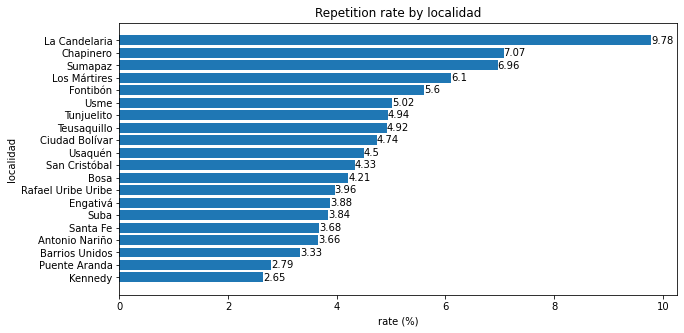

In [16]:
# Create bars and choose color

fig, ax = plt.subplots(figsize=(10,5))
bars = ax.barh(local.index, round(local["per"],2))
ax.bar_label(bars)

# Add title and axis names
plt.title('Repetition rate by localidad')
plt.xlabel('rate (%)')
plt.ylabel('localidad')
 
# Show graph
plt.show()

In [21]:
dic_nivel = {
    1 : "Preescolar",
    2 : "Primaria",
    3 : "Secundaria",
    4 : "Media",  
}

df["NIVEL"].replace(dic_nivel, inplace = True)

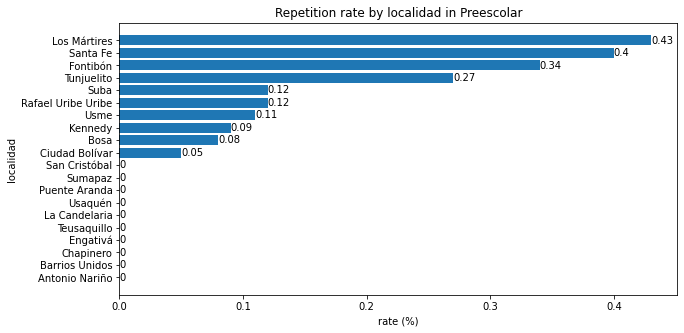

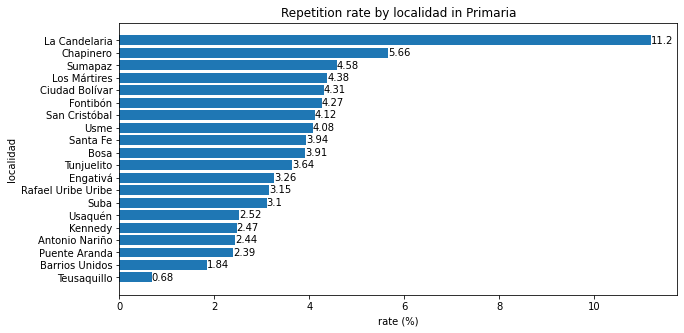

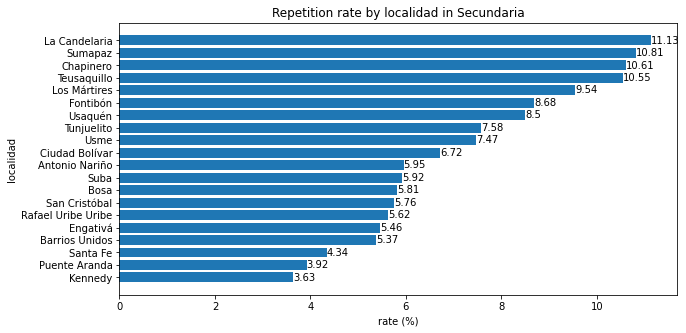

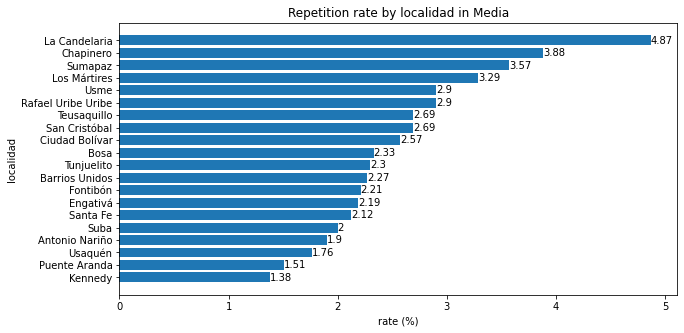

In [24]:
Niveles = ["Preescolar", "Primaria", "Secundaria", "Media"]

for i in Niveles:
    df_sub = df[df["NIVEL"] == i]
    local = df_sub.groupby(["DIR_NUM_LOCALIDAD"])["REPITENTE"].agg(['sum','count'])
    local["per"] = (local["sum"]/local["count"])*100
    local = local.sort_values("per")
    
    fig, ax = plt.subplots(figsize=(10,5))
    bars = ax.barh(local.index, round(local["per"],2))
    ax.bar_label(bars)
   
    plt.title('Repetition rate by localidad in ' + i)
    plt.xlabel('rate (%)')
    plt.ylabel('localidad')

    plt.show()
    
    
    
    


# OVERAGE


En los modelos no se tendrá en cuenta el nivel de preescolar. Entonces se excluyen de las gráficas

In [48]:
df_g = df[df["NIVEL"] != "Preescolar" ]

In [25]:
dic = {
    1 : "S",
    0: "N"}
df_g["REPITENTE"].replace(dic, inplace = True)

df_g["OVERAGE"].replace(dic, inplace = True)

In [49]:
crosstab = pd.crosstab(df_g["OVERAGE"], df_g["REPITENTE"], normalize = "index")*100

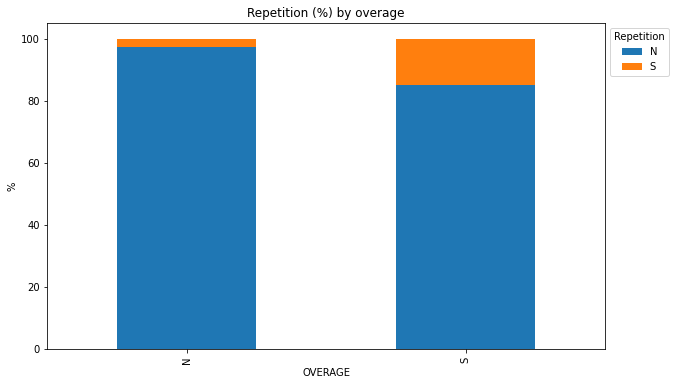

In [50]:
ax = crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_ylabel('%')
ax.set_title("Repetition (%) by overage")
plt.legend(title='Repetition', bbox_to_anchor=(1.0, 1), loc='upper left')
plt.show()

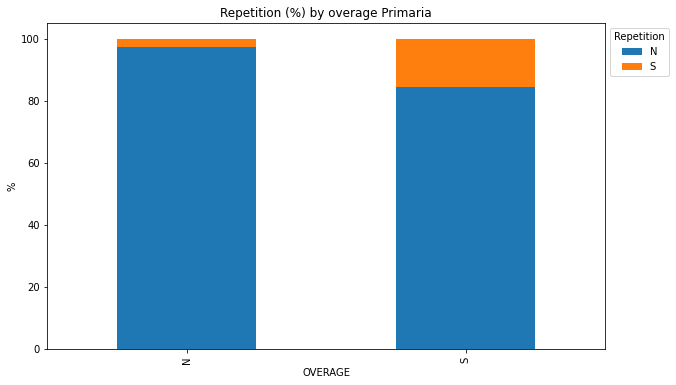

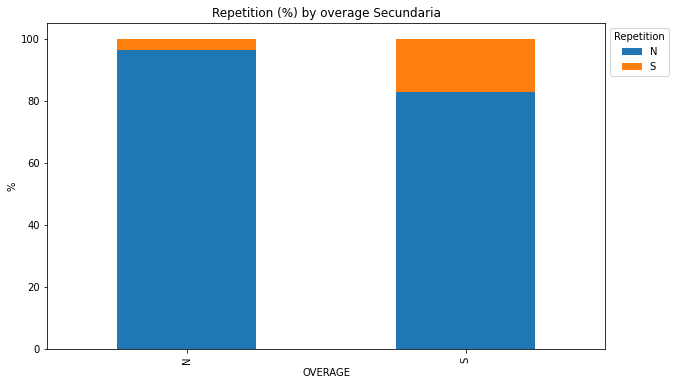

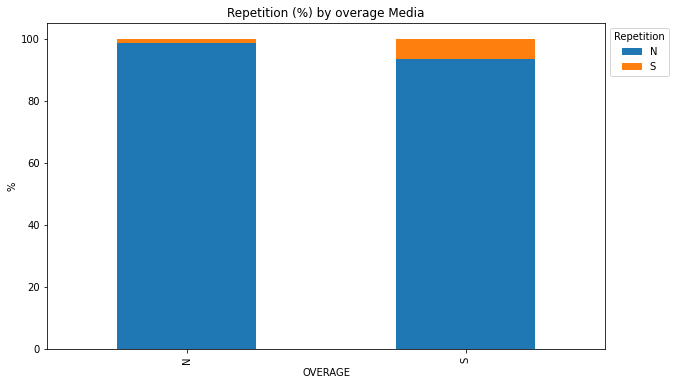

In [52]:
Niveles = [ "Primaria", "Secundaria", "Media"]

for i in Niveles:
    df_sub = df_g[df_g["NIVEL"] == i]
    crosstab = pd.crosstab(df_sub["OVERAGE"], df_sub["REPITENTE"], normalize = "index")*100 
    ax = crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))
    ax.set_ylabel('%')
    ax.set_title("Repetition (%) by overage " + i)
    plt.legend(title='Repetition', bbox_to_anchor=(1.0, 1), loc='upper left')
    plt.show()
   

# Genero

In [54]:
dic = {
    1 : "Hombre",
    0: "Mujer"}

df_g["GENERO"].replace(dic, inplace = True)

/opt/conda/lib/python3.8/site-packages/pandas/core/series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


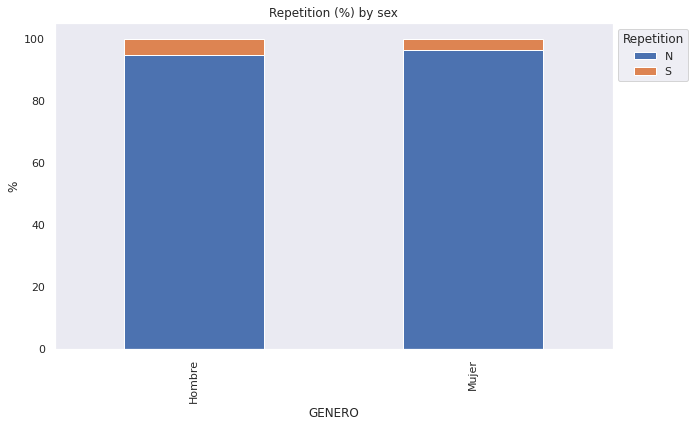

In [102]:
sns.set(style="dark")
crosstab = pd.crosstab(df_g["GENERO"], df_g["REPITENTE"], normalize = "index")*100
ax = crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_ylabel('%')
ax.set_title("Repetition (%) by sex")
plt.legend(title='Repetition', bbox_to_anchor=(1.0, 1), loc='upper left')
plt.show()

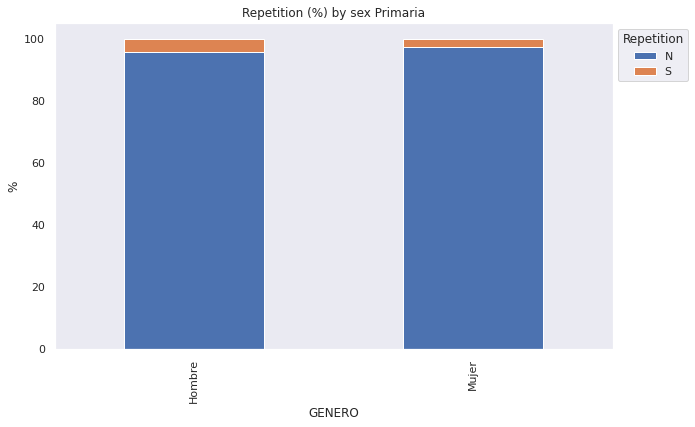

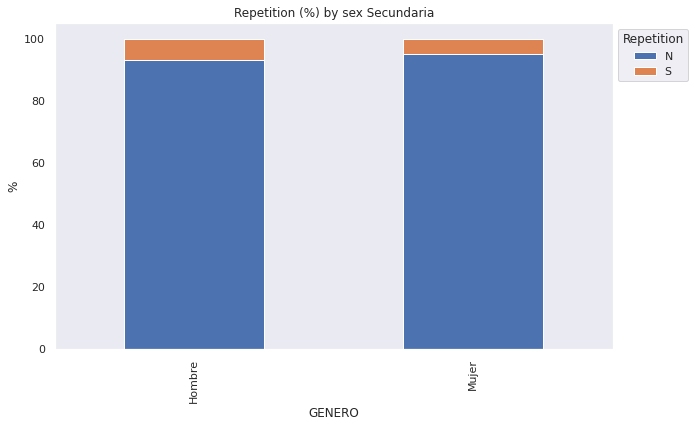

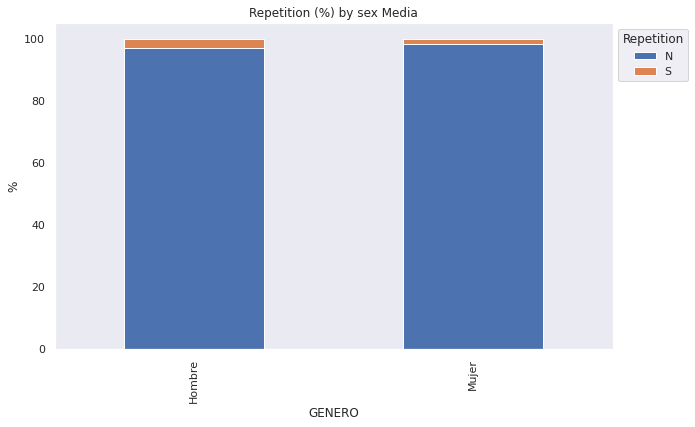

In [105]:
Niveles = [ "Primaria", "Secundaria", "Media"]

for i in Niveles:
    df_sub = df_g[df_g["NIVEL"] == i]
    crosstab = pd.crosstab(df_sub["GENERO"], df_sub["REPITENTE"], normalize = "index")*100 
    ax = crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))
    ax.set_ylabel('%')
    ax.set_title("Repetition (%) by sex " + i)
    plt.legend(title='Repetition', bbox_to_anchor=(1.0, 1), loc='upper left')
    plt.show()
   

# Puntaje Sisben 3

In [61]:
df_g["puntaje_sisben_3"]

count    431683.000000
mean         39.871685
std          16.580204
min           0.890000
25%          25.559999
50%          39.869999
75%          53.240002
max          88.059998
Name: puntaje_sisben_3, dtype: float64

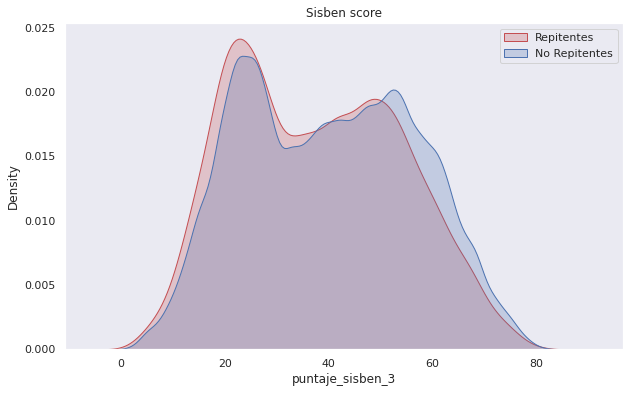

In [74]:
sns.set(style="dark", rc = {'figure.figsize':(10,6)})
 
fig = sns.kdeplot(df_g[df_g["REPITENTE"] == "S"]['puntaje_sisben_3'], label = "Repitentes",  shade=True, color="r")
fig = sns.kdeplot(df_g[df_g["REPITENTE"] == "N"]['puntaje_sisben_3'], label = "No Repitentes",  shade=True, color="b")
plt.title("Sisben score")
plt.legend()
plt.show()

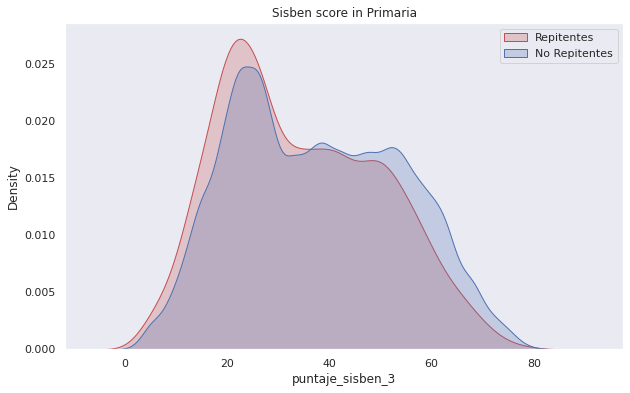

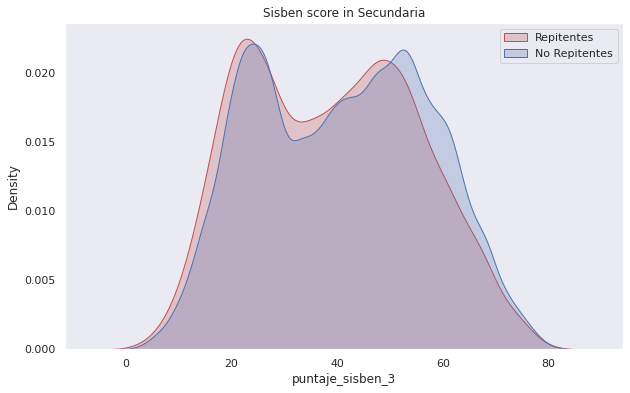

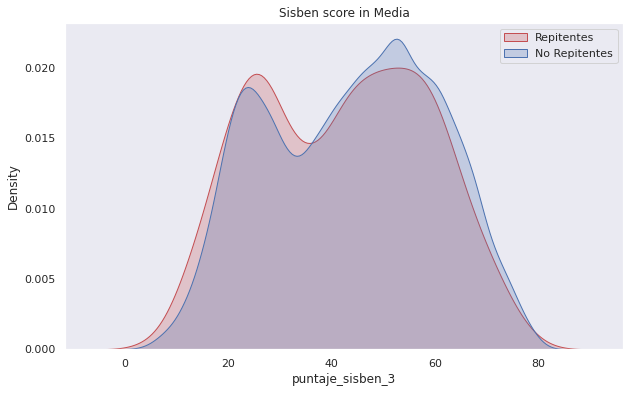

In [73]:
Niveles = [ "Primaria", "Secundaria", "Media"]

for i in Niveles:
    df_sub = df_g[df_g["NIVEL"] == i]
    
    
    sns.set(style="dark", rc = {'figure.figsize':(10,6)})
    fig = sns.kdeplot(df_sub[df_sub["REPITENTE"] == "S"]['puntaje_sisben_3'], label = "Repitentes",  shade=True, color="r")
    fig = sns.kdeplot(df_sub[df_sub["REPITENTE"] == "N"]['puntaje_sisben_3'], label = "No Repitentes",  shade=True, color="b")
    plt.title('Sisben score in ' + i)
    plt.legend()
    plt.show()

# Hacinamiento 


In [149]:
repi = {
    "S" : 1,
    "N": 0}
df_g["REPITENTE"].replace(repi, inplace = True)

/opt/conda/lib/python3.8/site-packages/pandas/core/series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


Text(0, 0.5, 'level of overcrowding rate')

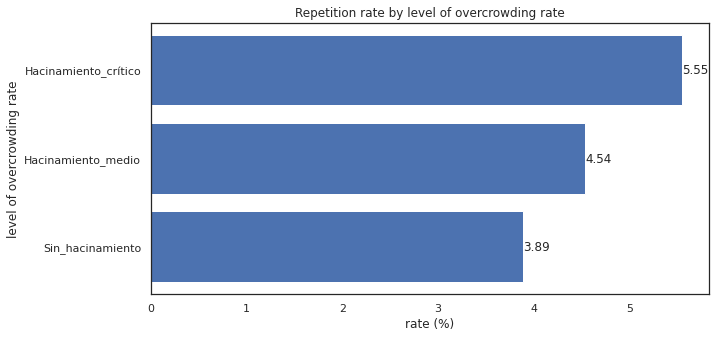

In [155]:
local = df_g.groupby(["nivel_hacinamiento"])["REPITENTE"].agg(['sum','count'])
local["per"] = (local["sum"]/local["count"])*100
local = local.sort_values("per")
    
fig, ax = plt.subplots(figsize=(10,5))
bars = ax.barh(local.index, round(local["per"],2))
ax.bar_label(bars)
   
plt.title('Repetition rate by level of overcrowding rate')
plt.xlabel('rate (%)')
plt.ylabel('level of overcrowding rate')

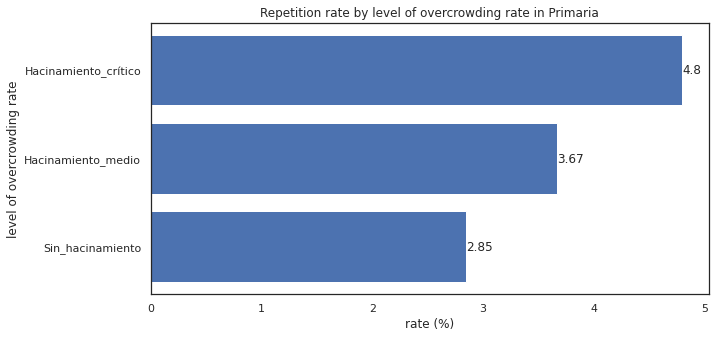

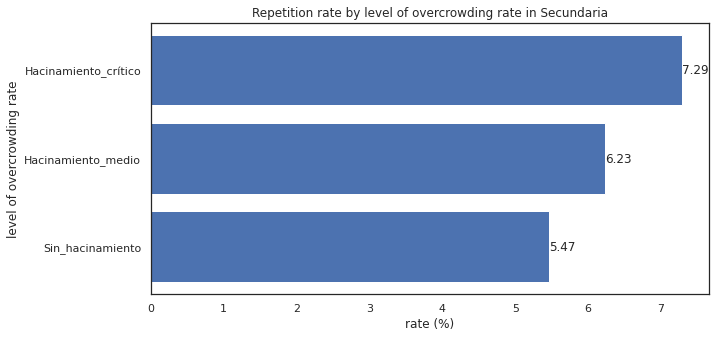

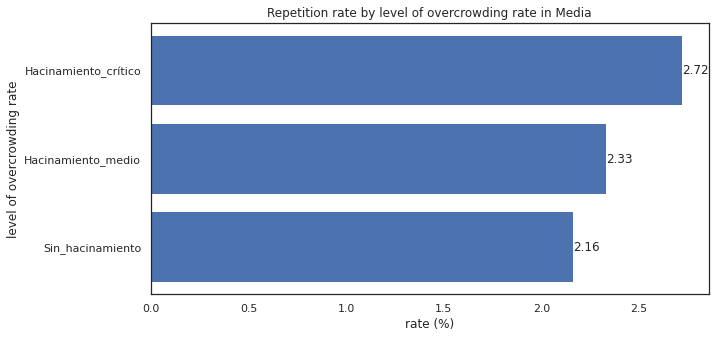

In [157]:
Niveles = ["Primaria", "Secundaria", "Media"]

for i in Niveles:
    df_sub = df[df["NIVEL"] == i]
    local = df_sub.groupby(["nivel_hacinamiento"])["REPITENTE"].agg(['sum','count'])
    local["per"] = (local["sum"]/local["count"])*100
    local = local.sort_values("per")
    
    fig, ax = plt.subplots(figsize=(10,5))
    bars = ax.barh(local.index, round(local["per"],2))
    ax.bar_label(bars)
   
    plt.title('Repetition rate by level of overcrowding rate in ' + i)
    plt.xlabel('rate (%)')
    plt.ylabel('level of overcrowding rate')

    plt.show()
    
    

# Etnia 

In [171]:
dic = {
    0 : "No aplica",
    1: "Indígenas",
    2: "Negritudes",
    3: "Rom",
    4: "Raizales",
    5: "Afrodescendientes",
    6: "Palenqueros",
}
df_g["CODIGO_ETNIA"].replace(dic, inplace = True)

/opt/conda/lib/python3.8/site-packages/pandas/core/series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [172]:
df_g["CODIGO_ETNIA"].value_counts()

No aplica            428180
Indígenas              1571
Negritudes             1228
Afrodescendientes       626
Raizales                 56
Palenqueros              13
Rom                       9
Name: CODIGO_ETNIA, dtype: int64

In [185]:
df_et = df_g[(df_g["CODIGO_ETNIA"] == "No aplica") | (df_g["CODIGO_ETNIA"] == "Indígenas") | (df_g["CODIGO_ETNIA"] == "Negritudes") | (df_g["CODIGO_ETNIA"] == "Afrodescendientes")] 

Text(0, 0.5, 'ethnicity')

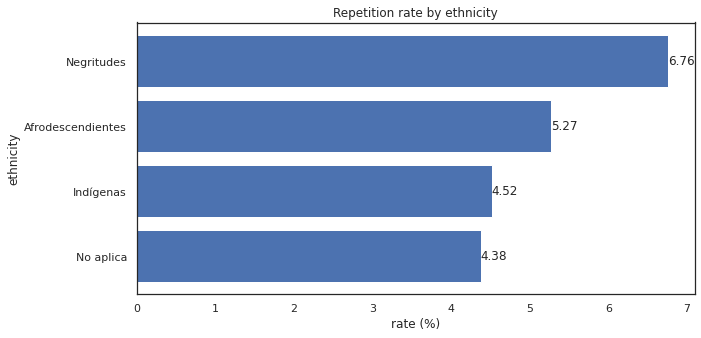

In [189]:
local = df_et.groupby(["CODIGO_ETNIA"])["REPITENTE"].agg(['sum','count'])
local["per"] = (local["sum"]/local["count"])*100
local = local.sort_values("per")
    
fig, ax = plt.subplots(figsize=(10,5))
bars = ax.barh(local.index, round(local["per"],2))
ax.bar_label(bars)
   
plt.title('Repetition rate by ethnicity')
plt.xlabel('rate (%)')
plt.ylabel('ethnicity')

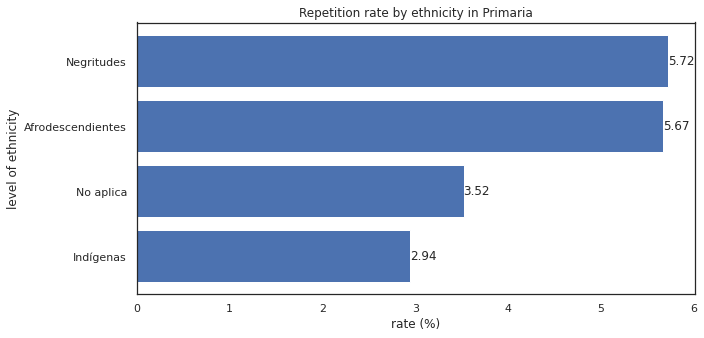

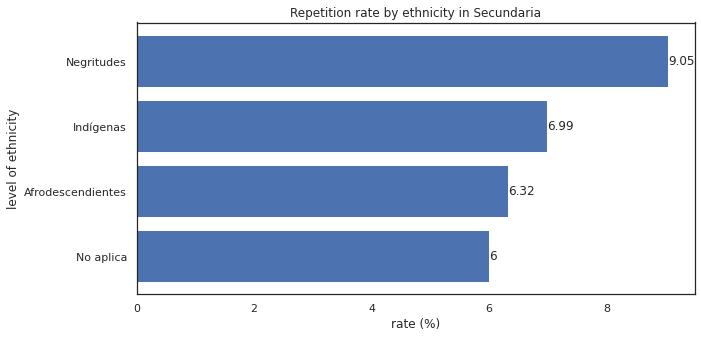

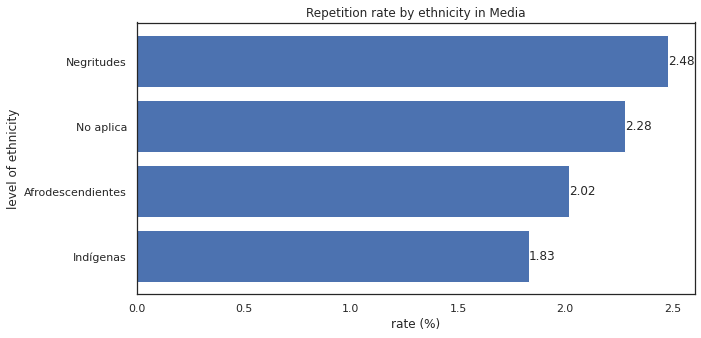

In [190]:
Niveles = ["Primaria", "Secundaria", "Media"]

for i in Niveles:
    df_sub = df_et[df_et["NIVEL"] == i]
    local = df_sub.groupby(["CODIGO_ETNIA"])["REPITENTE"].agg(['sum','count'])
    local["per"] = (local["sum"]/local["count"])*100
    local = local.sort_values("per")
    
    fig, ax = plt.subplots(figsize=(10,5))
    bars = ax.barh(local.index, round(local["per"],2))
    ax.bar_label(bars)
   
    plt.title('Repetition rate by ethnicity in ' + i)
    plt.xlabel('rate (%)')
    plt.ylabel('level of ethnicity')

    plt.show()

# Tenencia de computador

In [192]:
dic = {
    1 : "Tiene computador",
    0: "No tiene computador",
}
df_g["computador"].replace(dic, inplace = True)

/opt/conda/lib/python3.8/site-packages/pandas/core/series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


Text(0, 0.5, 'computer ownership')

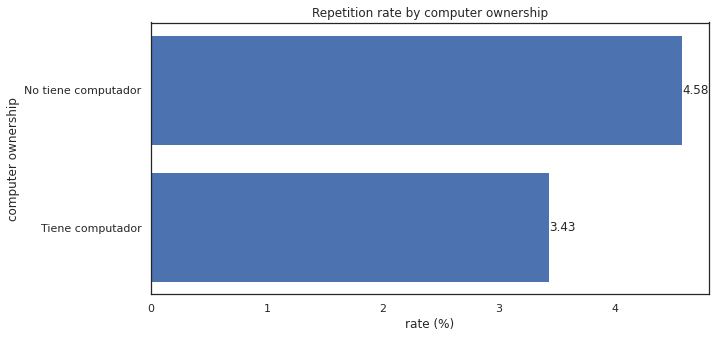

In [194]:
local = df_g.groupby(["computador"])["REPITENTE"].agg(['sum','count'])
local["per"] = (local["sum"]/local["count"])*100
local = local.sort_values("per")
    
fig, ax = plt.subplots(figsize=(10,5))
bars = ax.barh(local.index, round(local["per"],2))
ax.bar_label(bars)
   
plt.title('Repetition rate by computer ownership')
plt.xlabel('rate (%)')
plt.ylabel('computer ownership
')

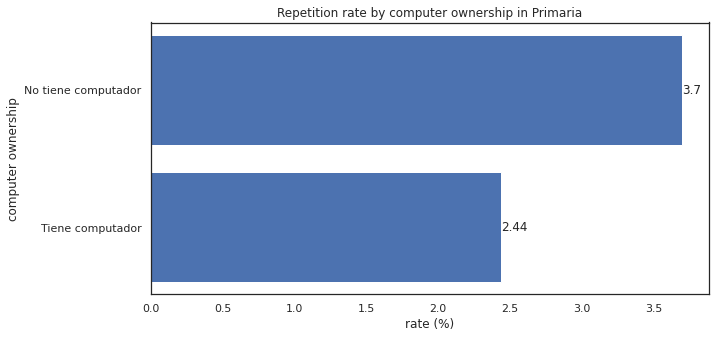

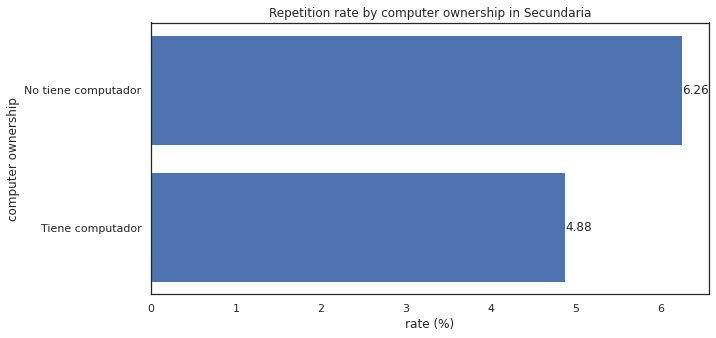

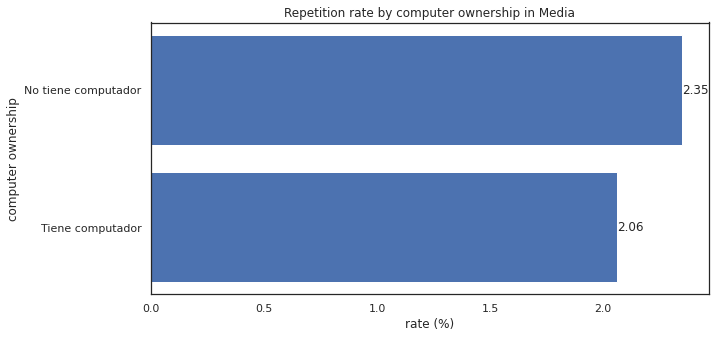

In [195]:
Niveles = ["Primaria", "Secundaria", "Media"]

for i in Niveles:
    df_sub = df_g[df_g["NIVEL"] == i]
    local = df_sub.groupby(["computador"])["REPITENTE"].agg(['sum','count'])
    local["per"] = (local["sum"]/local["count"])*100
    local = local.sort_values("per")
    
    fig, ax = plt.subplots(figsize=(10,5))
    bars = ax.barh(local.index, round(local["per"],2))
    ax.bar_label(bars)
   
    plt.title('Repetition rate by computer ownership in ' + i)
    plt.xlabel('rate (%)')
    plt.ylabel('computer ownership')

    plt.show()

# Tenencia de servicios públicos 

In [198]:
dic = {
    1 : "tiene todos los servicios públicos",
    0: "no tiene todos los servicios públicos",
}
df_g["todos_servicios_Pub"].replace(dic, inplace = True)

/opt/conda/lib/python3.8/site-packages/pandas/core/series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


Text(0, 0.5, 'public services')

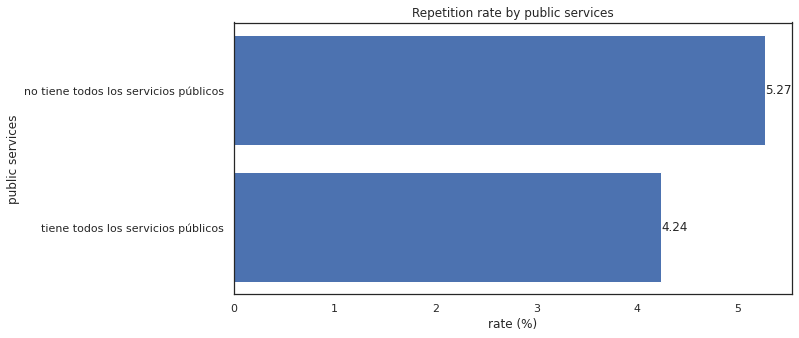

In [200]:
local = df_g.groupby(["todos_servicios_Pub"])["REPITENTE"].agg(['sum','count'])
local["per"] = (local["sum"]/local["count"])*100
local = local.sort_values("per")
    
fig, ax = plt.subplots(figsize=(10,5))
bars = ax.barh(local.index, round(local["per"],2))
ax.bar_label(bars)
   
plt.title('Repetition rate by public services')
plt.xlabel('rate (%)')
plt.ylabel('public services')

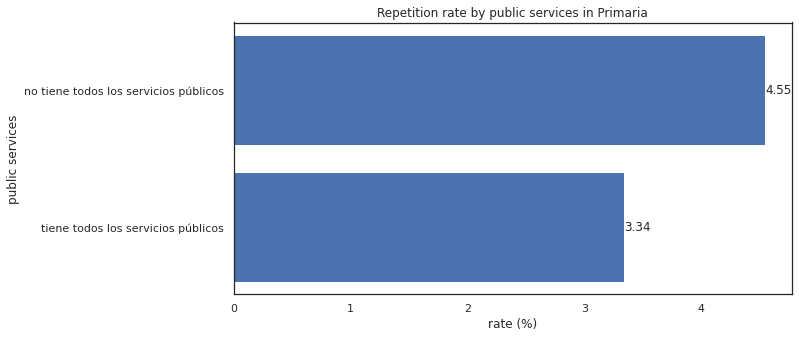

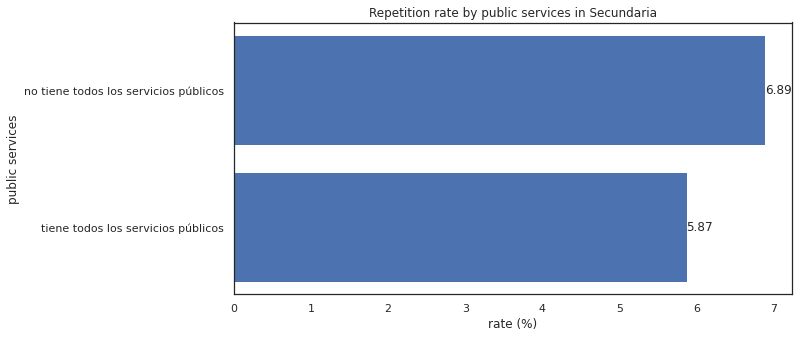

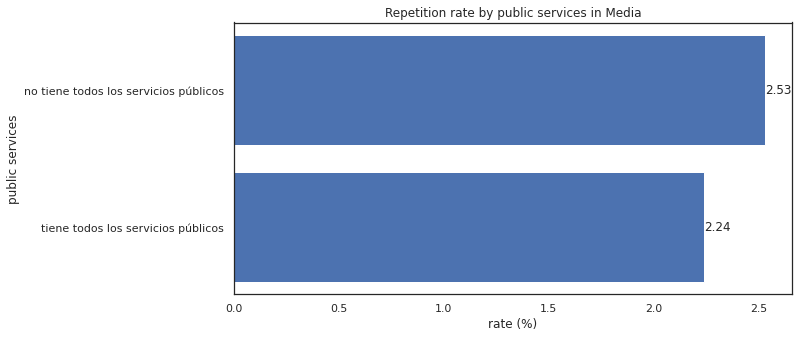

In [201]:
Niveles = ["Primaria", "Secundaria", "Media"]

for i in Niveles:
    df_sub = df_g[df_g["NIVEL"] == i]
    local = df_sub.groupby(["todos_servicios_Pub"])["REPITENTE"].agg(['sum','count'])
    local["per"] = (local["sum"]/local["count"])*100
    local = local.sort_values("per")
    
    fig, ax = plt.subplots(figsize=(10,5))
    bars = ax.barh(local.index, round(local["per"],2))
    ax.bar_label(bars)
   
    plt.title('Repetition rate by public services in ' + i)
    plt.xlabel('rate (%)')
    plt.ylabel('public services')

    plt.show()

# Colegio bilingue  

In [203]:
dic = {
    1 : "Sí",
    0: "No",
}
df_g["ES_BILINGUE"].replace(dic, inplace = True)

/opt/conda/lib/python3.8/site-packages/pandas/core/series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


Text(0, 0.5, 'public services')

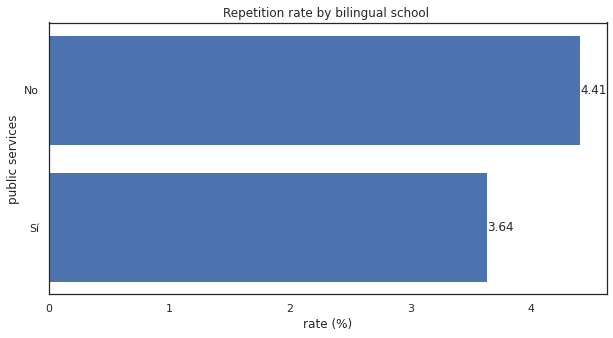

In [208]:
local = df_g.groupby(["ES_BILINGUE"])["REPITENTE"].agg(['sum','count'])
local["per"] = (local["sum"]/local["count"])*100
local = local.sort_values("per")
    
fig, ax = plt.subplots(figsize=(10,5))
bars = ax.barh(local.index, round(local["per"],2))
ax.bar_label(bars)
   
plt.title('Repetition rate by bilingual school ')
plt.xlabel('rate (%)')
plt.ylabel('public services')

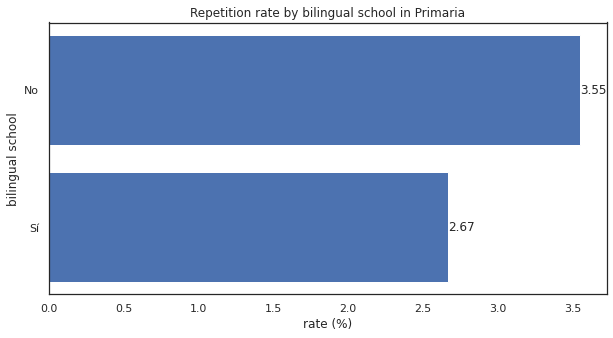

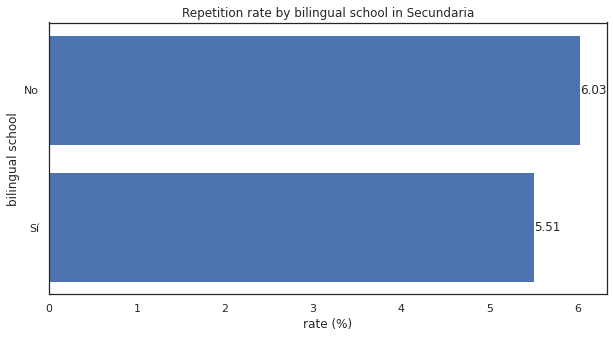

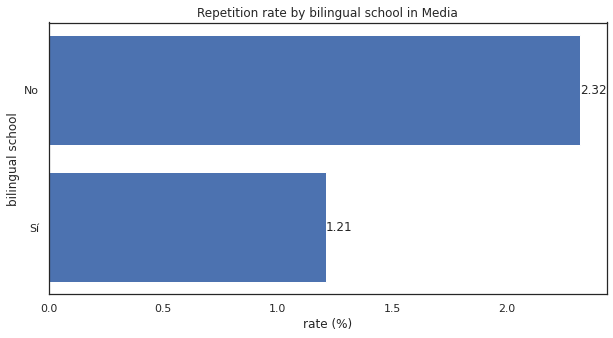

In [209]:
Niveles = ["Primaria", "Secundaria", "Media"]

for i in Niveles:
    df_sub = df_g[df_g["NIVEL"] == i]
    local = df_sub.groupby(["ES_BILINGUE"])["REPITENTE"].agg(['sum','count'])
    local["per"] = (local["sum"]/local["count"])*100
    local = local.sort_values("per")
    
    fig, ax = plt.subplots(figsize=(10,5))
    bars = ax.barh(local.index, round(local["per"],2))
    ax.bar_label(bars)
   
    plt.title('Repetition rate by bilingual school in ' + i)
    plt.xlabel('rate (%)')
    plt.ylabel('bilingual school')

    plt.show()

# hacinamiento (forma continua) + puntaje sisben 3

In [ ]:
dic = {
    1 : "S",
    0: "N"}
df_g["REPITENTE"].replace(dic, inplace = True)

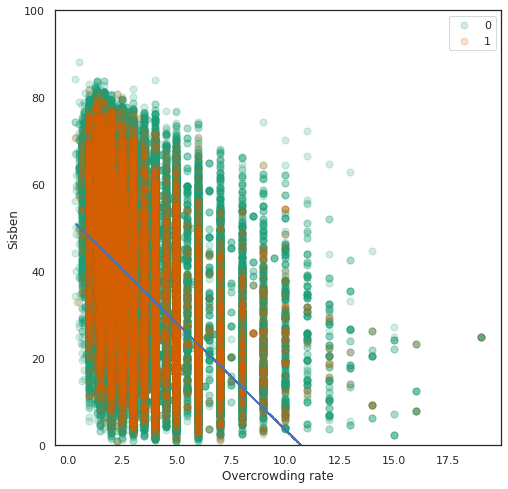

In [159]:
sns.set(style="white", rc = {'figure.figsize':(10,6)})
haci =df_g["indice_hacinamiento"].values
sisben = df_g["puntaje_sisben_3"].values

REP = df_g["REPITENTE"].values
REP1 = np.unique(REP)
COLORS = ["#1B9E77", "#D95F02"]

fig, ax = plt.subplots(figsize=(8,8))

for rep, color in zip(REP1, COLORS):
    idxs = np.where(REP == rep)
    ax.scatter(
        haci[idxs], sisben[idxs], label=rep,
        s=50, color=color, alpha=0.2
    )
z = np.polyfit(haci[idxs], sisben[idxs], 1)
p = np.poly1d(z)
plt.plot(haci[idxs],p(haci[idxs]),"b--")                
plt.ylim(0, 100)


ax.set_ylabel('Sisben')   
ax.set_xlabel('Overcrowding rate')  
ax.legend();

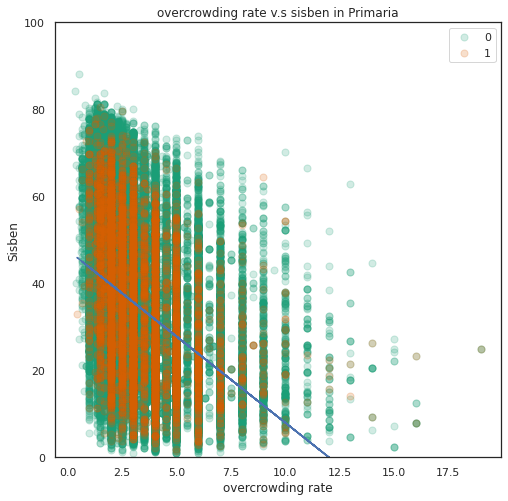

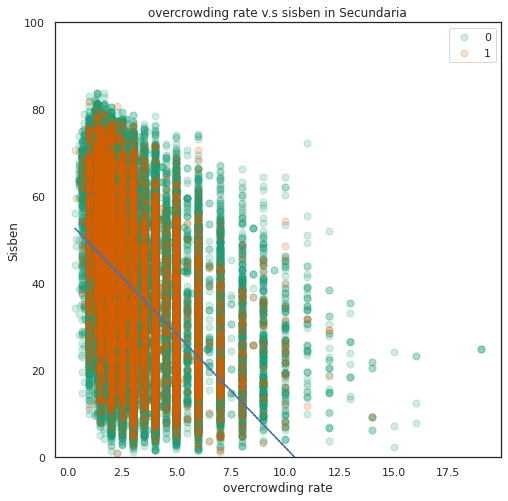

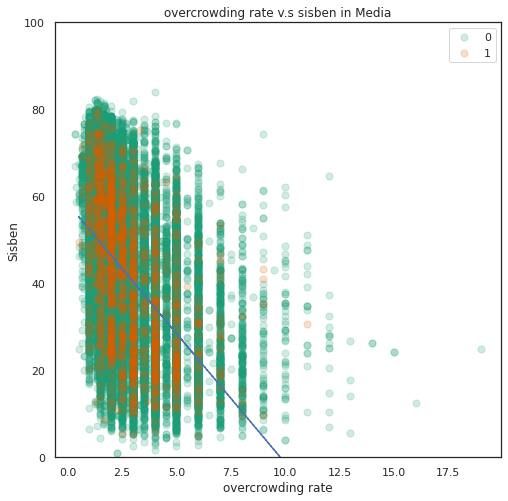

In [158]:
for i in Niveles:
    df_sub = df_g[df_g["NIVEL"] == i]
    haci =df_sub["indice_hacinamiento"].values
    sisben = df_sub["puntaje_sisben_3"].values

    REP = df_sub["REPITENTE"].values
    REP1 = np.unique(REP)
    COLORS = ["#1B9E77", "#D95F02"]

    fig, ax = plt.subplots(figsize=(8,8))

    for rep, color in zip(REP1, COLORS):
        idxs = np.where(REP == rep)
        ax.scatter(
            haci[idxs], sisben[idxs], label=rep,
            s=50, color=color, alpha=0.2
        )
    z = np.polyfit(haci[idxs], sisben[idxs], 1)
    p = np.poly1d(z)
    plt.plot(haci[idxs],p(haci[idxs]),"b--")                
    plt.ylim(0, 100)  
    ax.set_title("Overcrowding rate v.s sisben in " + i)
    ax.set_ylabel('Sisben')   
    ax.set_xlabel('Overcrowding rate')  
    ax.legend();
    
    
    

# School Saber 11 score mean

Text(0, 0.5, 'School Saber 11 score mean')

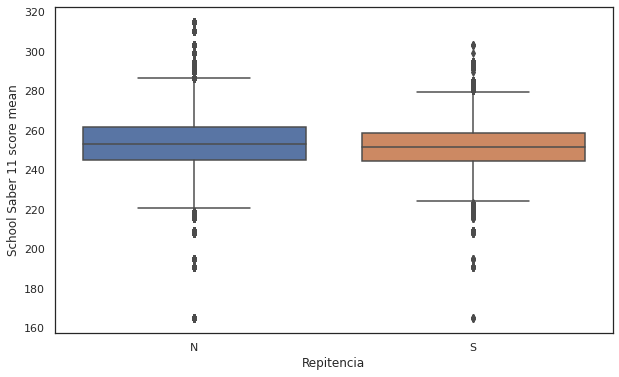

In [134]:

sns.boxplot( x= df["REPITENTE"], y=df_g["promepuntaje"] )
plt.xlabel('Repitencia')
plt.ylabel('School Saber 11 score mean')


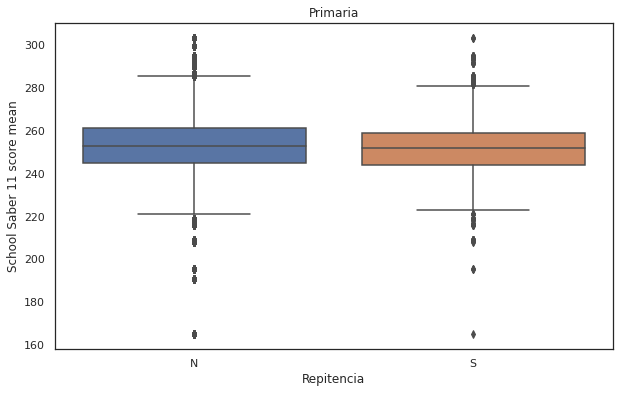

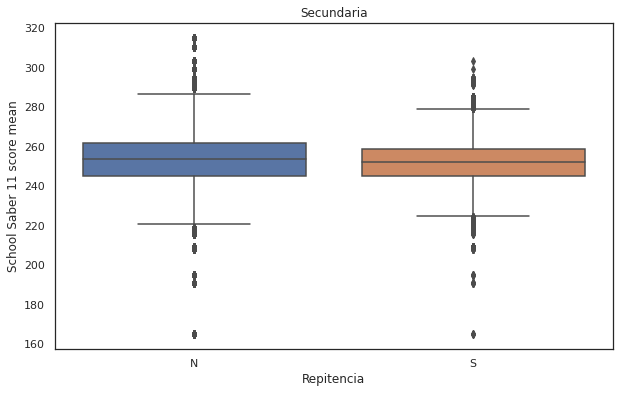

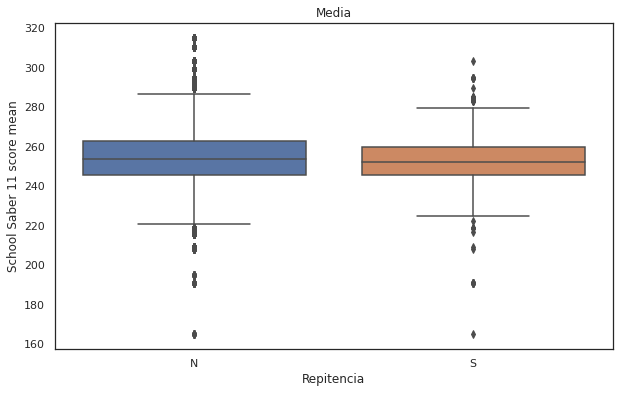

In [138]:
for i in Niveles:
    df_sub = df_g[df_g["NIVEL"] == i]
    sns.boxplot( x= df_sub["REPITENTE"], y=df_sub["promepuntaje"] )
    plt.xlabel('Repitencia')
    plt.ylabel('School Saber 11 score mean')
    plt.title(i)
    plt.show()



# School Computer per student

Text(0, 0.5, 'Computer per student')

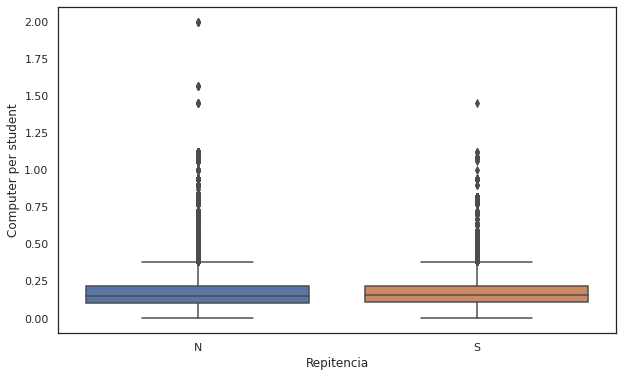

In [140]:

sns.boxplot( x= df["REPITENTE"], y=df_g["COMPU_POR_ALUMN"] )
plt.xlabel('Repitencia')
plt.ylabel('Computer per student')

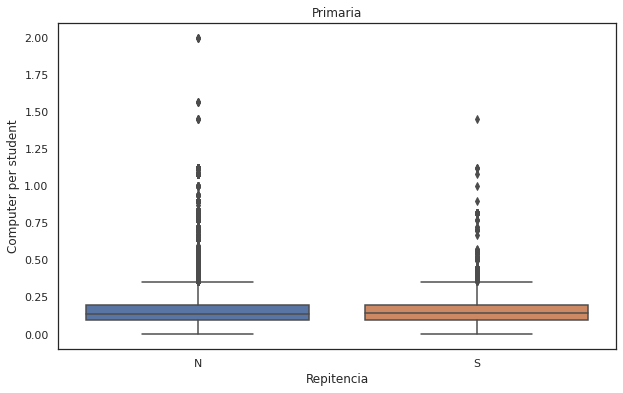

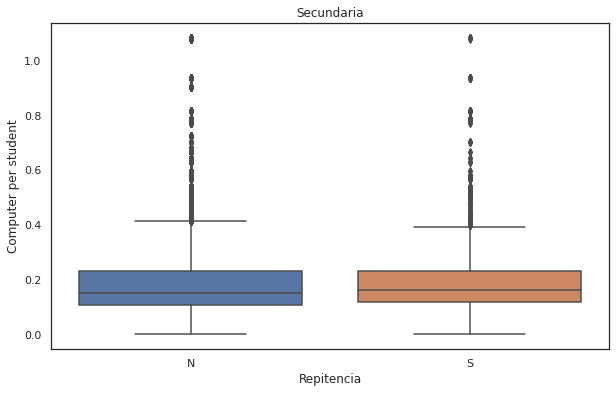

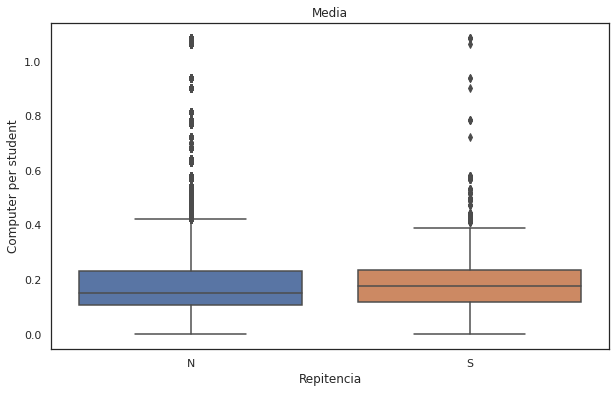

In [141]:
for i in Niveles:
    df_sub = df_g[df_g["NIVEL"] == i]
    sns.boxplot( x= df_sub["REPITENTE"], y=df_sub["COMPU_POR_ALUMN"] )
    plt.xlabel('Repitencia')
    plt.ylabel('Computer per student')
    plt.title(i)
    plt.show()


# Computador por alumno + promedio de puntaje saber 11 (variables por escuela)

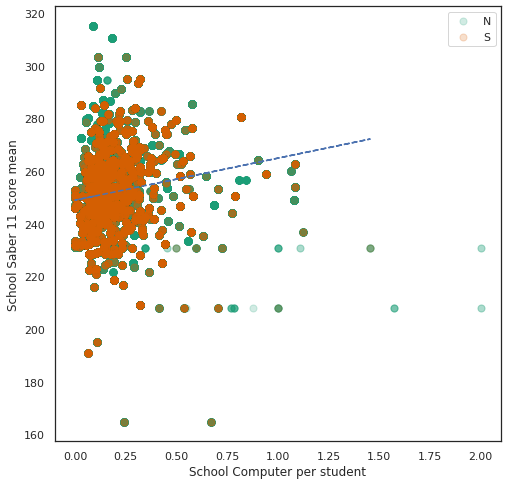

In [127]:
sns.set(style="white", rc = {'figure.figsize':(10,6)})
haci =df_g["COMPU_POR_ALUMN"].values
sisben = df_g["promepuntaje"].values

REP = df_g["REPITENTE"].values
REP1 = np.unique(REP)
COLORS = ["#1B9E77", "#D95F02"]

fig, ax = plt.subplots(figsize=(8,8))

for rep, color in zip(REP1, COLORS):
    idxs = np.where(REP == rep)
    ax.scatter(
        haci[idxs], sisben[idxs], label=rep,
        s=50, color=color, alpha=0.2
    )
z = np.polyfit(haci[idxs], sisben[idxs], 1)
p = np.poly1d(z)
plt.plot(haci[idxs],p(haci[idxs]),"b--")                

ax.set_ylabel('School Saber 11 score mean')   
ax.set_xlabel('School Computer per student')  
ax.legend();

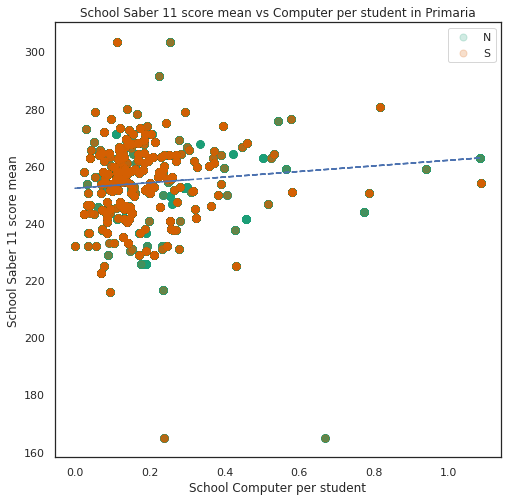

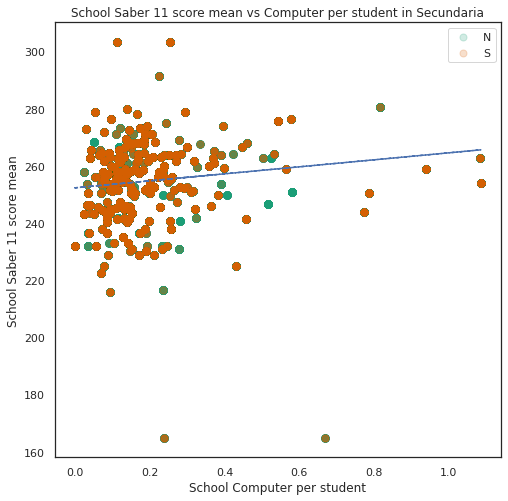

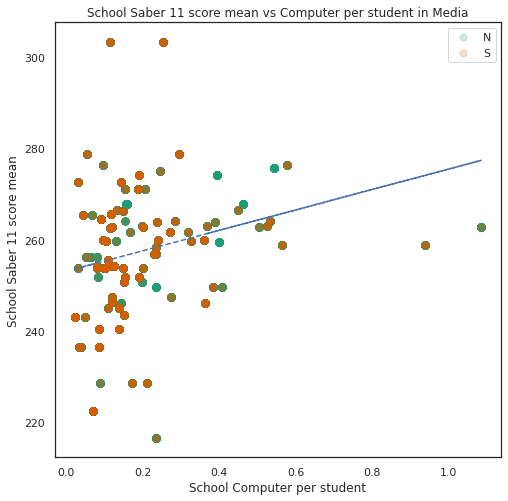

In [130]:
for i in Niveles:
    df_sub = df_g[df_g["NIVEL"] == i]
    haci =df_g["COMPU_POR_ALUMN"].values
    sisben = df_g["promepuntaje"].values

    REP = df_sub["REPITENTE"].values
    REP1 = np.unique(REP)
    COLORS = ["#1B9E77", "#D95F02"]

    fig, ax = plt.subplots(figsize=(8,8))

    for rep, color in zip(REP1, COLORS):
        idxs = np.where(REP == rep)
        ax.scatter(
            haci[idxs], sisben[idxs], label=rep,
            s=50, color=color, alpha=0.2
        )
    z = np.polyfit(haci[idxs], sisben[idxs], 1)
    p = np.poly1d(z)
    plt.plot(haci[idxs],p(haci[idxs]),"b--")                
    ax.set_title("School Saber 11 score mean vs Computer per student in " + i)
    ax.set_ylabel('School Saber 11 score mean')   
    ax.set_xlabel('School Computer per student')  
    ax.legend();

# Edad vs Grado (repitente y no repitente)


In [164]:
df_merged1 =df_g[df_g["CODIGO_GRADO"]!=99]


In [165]:
EDAD=df_merged1["EDAD"].values
GRADO = df_merged1["CODIGO_GRADO"].values

REP = df_merged1["REPITENTE"].values
REP1 = np.unique(REP)
COLORS = ["#1B9E77", "#D95F02"]

GRADO

array([10, 11, 11, ...,  9,  9,  9], dtype=int8)

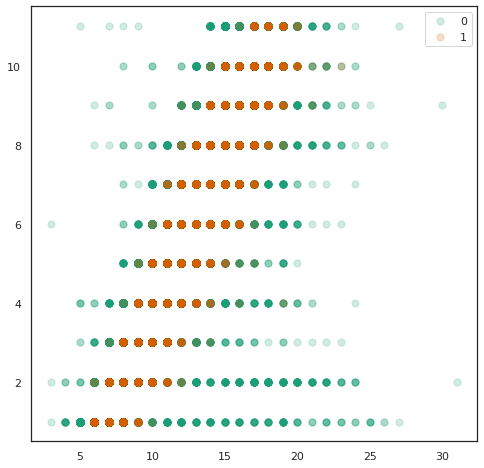

In [166]:
fig, ax = plt.subplots(figsize=(8,8))

for rep, color in zip(REP1, COLORS):
    idxs = np.where(REP == rep)
    ax.scatter(
        EDAD[idxs], GRADO[idxs], label=rep,
        s=50, color=color, alpha=0.2
    )
    
ax.legend();

In [ ]:
merge = simat.merge(sisben, left_on = "NRO_DOCUMENTO", right_on = "documen")